# Prototype: iota

| Properties      | Data    |
|---------------|-----------|
| *Labels* | `['BENIGN', 'DDoS']` |
| *Normalization* | `Min-Max` |
| *Sample Size* | `10.000`|
| *Adversarial Attack* | `FGSM & C&W` |
| *Explanations* | `SHAP` |
| *Detector* | `Detect misclassified Samples of both Attacks` |


---

## *Has to be run first alone!*

In [2]:
# To import modules from the functions directory
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

## Data Preprocessing

In [3]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

encoding_type = 0 # binary encoding
norm_type = 0 # min-max normalization
label_names = ['BENIGN', 'DDoS'] # labels to include
sample_size = 5000 # sample size for each label -> 2 x sample_size = total samples

dataset = dp.build_dataset(label_names)

normalizer, zero_columns = dp.generate_normalizer(dataset, norm_type)

feature_df, label_df, used_indices = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=sample_size, random_sample_state=42)
print(f"Generate Features | Indices: {feature_df.index[:5]}... | Shape: {feature_df.shape}")
print(f"Generate Labels | Indices: {label_df.index[:5]}... | Shape: {label_df.shape}")
print(label_df.value_counts()) # -> will first show [0, 1] then [1, 0] if label number is equal

-- Building CICIDS2017 dataset --
--- Combining all CICIDS2017 files ---
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
--- Removing NaN and Infinity values ---
Removing 1358 Rows with NaN values
Removing 1509 Rows with Infinity values
--- Extracting labels ---
 Label
BENIGN    2271320
DDoS       128025
Name: count, dtype: int64
-- Generating normalizer --
--- Splitting labels and features ---
Zero Columns: [' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (10000, 79)
--- Splitti

## Split Data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 70) (2000, 70) (8000, 2) (2000, 2)


## Create IDS

In [5]:
import functions.intrusion_detection_system as ids
import importlib
importlib.reload(ids)

# TODO: build ids with complete dataset
# X_train_all, y_train_all, _ = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, random_sample_state=42)
# print(y_train_all.value_counts())
# X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)
# print(X_train_all.shape, X_test_all.shape, y_train_all.shape, y_test_all.shape)

# build ids and evaluate it on test data
ids_model = ids.build_intrusion_detection_system(X_train, y_train, X_test, y_test)
# store prediction from X_train
y_pred = ids.predict(ids_model, X_train, columns=y_train.columns)
print(f"Predictions on Normal Data | Indices: {y_pred.index[:5]}... | Shape: {y_pred.shape}")

2025-03-24 15:32:35.920971: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742826755.931629  111106 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742826755.934877  111106 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-24 15:32:35.946145: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10


2025-03-24 15:32:37.310183: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8144 - loss: 0.5964 - val_accuracy: 0.9775 - val_loss: 0.2770
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9747 - loss: 0.1938 - val_accuracy: 0.9812 - val_loss: 0.0661
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9803 - loss: 0.0637 - val_accuracy: 0.9837 - val_loss: 0.0508
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9827 - loss: 0.0506 - val_accuracy: 0.9856 - val_loss: 0.0433
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9834 - loss: 0.0445 - val_accuracy: 0.9856 - val_loss: 0.0378
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9835 - loss: 0.0412 - val_accuracy: 0.9862 - val_loss: 0.0341
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9843 - loss: 0.0384 - val_accuracy: 0.9881 - val_loss: 0.0323
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9847 - loss: 0.0367 - val_accuracy: 0.9887 - val_loss: 0.0306
Epo

2025-03-24 15:32:39.149084: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
Predictions on Normal Data | Indices: Index([383258, 1283627, 1595713, 323550, 474229], dtype='int64')... | Shape: (8000, 2)


## Generate C&W and FGSM Attacks

In [6]:
import functions.attack_generator as ag
import importlib
import numpy as np
importlib.reload(ag)

all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

# split train data into data for generating fgsm and cw attacks
X_fgsm, X_cw, y_fgsm, y_cw = train_test_split(X_train, y_train, test_size=0.5, random_state=15)
print(X_fgsm.shape, X_cw.shape, y_fgsm.shape, y_cw.shape)

# generate attacks on the separated training data
# TODO: when changing epsilon, the detector accuracy rises
X_adv_fgsm = ag.generate_fgsm_attacks(art_model, X_fgsm, 1)
print(f"Create Adversarial Attack | Indices: {X_adv_fgsm.index[:5]}... | Shape: {X_adv_fgsm.shape}")
y_pred_adv_fgsm = ag.evaluate_art_model(art_model, X_adv_fgsm, y_fgsm)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_fgsm.index[:5]}... | Shape: {y_pred_adv_fgsm.shape}")
y_pred_fgsm = y_pred.loc[X_fgsm.index]

import multiprocessing
num_cores = multiprocessing.cpu_count()
X_adv_cw = ag.generate_cw_attacks_parallel(art_model, X_cw, 1, num_cores=num_cores)
print(f"Create Adversarial Attack | Indices: {X_adv_cw.index[:5]}... | Shape: {X_adv_cw.shape}")
y_pred_adv_cw = ag.evaluate_art_model(art_model, X_adv_cw, y_cw)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_cw.index[:5]}... | Shape: {y_pred_adv_cw.shape}")
y_pred_cw = y_pred.loc[X_cw.index]

(4000, 70) (4000, 70) (4000, 2) (4000, 2)
Adversarial FGSM examples generated. Shape: (4000, 70)
Create Adversarial Attack | Indices: Index([305763, 2410673, 473894, 311088, 1632424], dtype='int64')... | Shape: (4000, 70)
Accuracy: 49.70%
              precision    recall  f1-score   support

      ATTACK       0.00      0.00      0.00      2012
      BENIGN       0.50      1.00      0.66      1988

    accuracy                           0.50      4000
   macro avg       0.25      0.50      0.33      4000
weighted avg       0.25      0.50      0.33      4000

Confusion Matrix: Positive == BENIGN
TN: 0, FP: 2012, FN: 0, TP: 1988
Predictions on Adversarial Attacks | Indices: Index([305763, 2410673, 473894, 311088, 1632424], dtype='int64')... | Shape: (4000, 2)
Running attack using 24 CPU cores...

Process 112398 is generating adversarial examples for batch of size 166 
Process 112397 is generating adversarial examples for batch of size 166 
Process 112400 is generating adversarial exampl

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/166 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/182 [00:00<?, ?it/s]

Create Adversarial Attack | Indices: Index([358687, 2773523, 323364, 430929, 467866], dtype='int64')... | Shape: (4000, 70)
Accuracy: 75.55%
              precision    recall  f1-score   support

      ATTACK       1.00      0.51      0.68      2000
      BENIGN       0.67      1.00      0.80      2000

    accuracy                           0.76      4000
   macro avg       0.84      0.76      0.74      4000
weighted avg       0.84      0.76      0.74      4000

Confusion Matrix: Positive == BENIGN
TN: 1022, FP: 978, FN: 0, TP: 2000
Predictions on Adversarial Attacks | Indices: Index([358687, 2773523, 323364, 430929, 467866], dtype='int64')... | Shape: (4000, 2)


In [7]:
def get_correctly_benign_classified_indices(y_train, y_pred):
    benign_indices = y_train[y_train['BENIGN'] == 1].index
    benign_adv_predicted_indices = y_pred[y_pred['BENIGN'] == 1].index
    correctly_benign_classified_indices = benign_indices.intersection(benign_adv_predicted_indices)
    return correctly_benign_classified_indices

def get_misclassified_as_benign_due_attack_indices(y_train, y_pred, y_pred_adv):
    attack_indices = y_train[y_train['ATTACK'] == 1].index
    attack_adv_predicted_indices = y_pred[y_pred['ATTACK'] == 1].index
    benign_predicted_adversarial_indices = y_pred_adv[y_pred_adv['BENIGN'] == 1].index
    misclassified_as_benign_due_attack_indices = attack_indices.intersection(attack_adv_predicted_indices).intersection(benign_predicted_adversarial_indices)
    return misclassified_as_benign_due_attack_indices

In [8]:
correctly_benign_classified_indices = get_correctly_benign_classified_indices(y_train, y_pred)
correctly_benign_classified_indices_fgsm = get_correctly_benign_classified_indices(y_fgsm, y_pred_adv_fgsm)
misclassified_as_benign_due_attack_indices_fgsm = get_misclassified_as_benign_due_attack_indices(y_fgsm, y_pred_fgsm, y_pred_adv_fgsm)
correctly_benign_classified_indices_cw = get_correctly_benign_classified_indices(y_cw, y_pred_cw)
misclassified_as_benign_due_attack_indices_cw = get_misclassified_as_benign_due_attack_indices(y_cw, y_pred_cw, y_pred_adv_cw)
print(f"Correctly classified as BENIGN from the IDS: {len(correctly_benign_classified_indices)} | Indices: {correctly_benign_classified_indices[:3]}")
print(f"Correctly classified as BENIGN from the IDS (FGSM): {len(correctly_benign_classified_indices_fgsm)} | Indices: {correctly_benign_classified_indices_fgsm[:3]}")
print(f"ATTACK sample misclassified as BENIGN due to adversarial attack (FGSM): {len(misclassified_as_benign_due_attack_indices_fgsm)} | Indices: {misclassified_as_benign_due_attack_indices_fgsm[:3]}")
print(f"Correctly classified as BENIGN from the IDS (CW): {len(correctly_benign_classified_indices_cw)} | Indices: {correctly_benign_classified_indices_cw[:3]}")
print(f"ATTACK sample misclassified as BENIGN due to adversarial attack (CW): {len(misclassified_as_benign_due_attack_indices_cw)} | Indices: {misclassified_as_benign_due_attack_indices_cw[:3]}")

Correctly classified as BENIGN from the IDS: 3878 | Indices: Index([1283627, 1595713, 953730], dtype='int64')
Correctly classified as BENIGN from the IDS (FGSM): 1988 | Indices: Index([2410673, 1632424, 238489], dtype='int64')
ATTACK sample misclassified as BENIGN due to adversarial attack (FGSM): 2009 | Indices: Index([305763, 473894, 311088], dtype='int64')
Correctly classified as BENIGN from the IDS (CW): 1936 | Indices: Index([2773523, 2550577, 1631321], dtype='int64')
ATTACK sample misclassified as BENIGN due to adversarial attack (CW): 976 | Indices: Index([323364, 430929, 467866], dtype='int64')


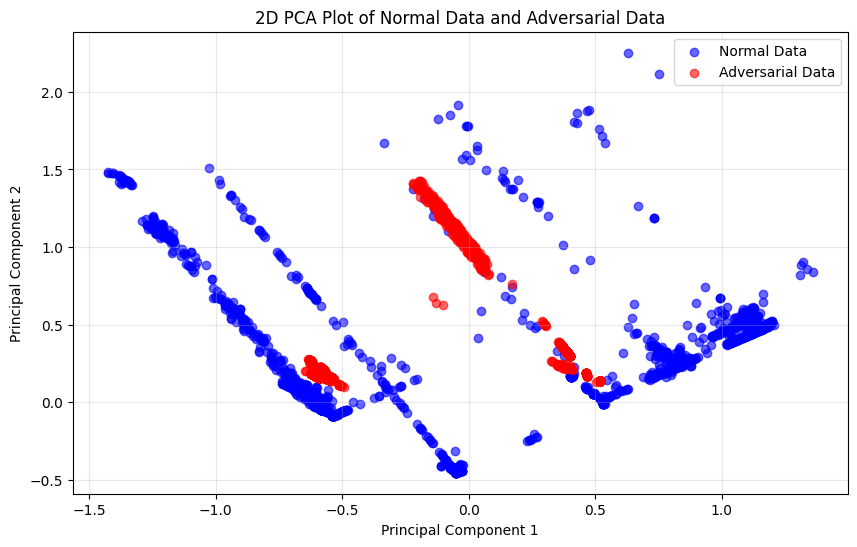

In [9]:
import functions.visualizer as visualizer
import importlib
importlib.reload(visualizer)

visualizer.visualize_data_distribution(X_train.loc[correctly_benign_classified_indices], 'Normal Data', X_adv_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], 'Adversarial Data')
# visualizer.pca_visualization_side_by_side(X_train.loc[misclassified_as_benign_due_attack_indices], 'Normal Data', X_adv.loc[misclassified_as_benign_due_attack_indices], 'Adversarial Data')

## Explainer

In [10]:
import functions.explainer as exp
import importlib
importlib.reload(exp)

explainer = exp.generate_shap_explainer(ids_model, X_train)

shap_values, shap_values_df = exp.generate_shap_values(explainer, X_train)
print(f"Generate Explanations | Indices: {shap_values_df.index[:5]}... | Shape: {shap_values_df.shape}")

_, shap_values_adv_df_fgsm = exp.generate_shap_values(explainer, X_adv_fgsm)
print(f"Generate Adversarial Explanations | Indices: {shap_values_adv_df_fgsm.index[:5]}... | Shape: {shap_values_adv_df_fgsm.shape}")

_, shap_values_adv_df_cw = exp.generate_shap_values(explainer, X_adv_cw)
print(f"Generate Adversarial Explanations | Indices: {shap_values_adv_df_cw.index[:5]}... | Shape: {shap_values_adv_df_cw.shape}")

PermutationExplainer explainer: 8001it [04:07, 31.39it/s]                          


Generate Explanations | Indices: Index([383258, 1283627, 1595713, 323550, 474229], dtype='int64')... | Shape: (8000, 70)


PermutationExplainer explainer: 4001it [01:59, 30.83it/s]                          


Generate Adversarial Explanations | Indices: Index([305763, 2410673, 473894, 311088, 1632424], dtype='int64')... | Shape: (4000, 70)


PermutationExplainer explainer: 4001it [02:13, 28.04it/s]                          

Generate Adversarial Explanations | Indices: Index([358687, 2773523, 323364, 430929, 467866], dtype='int64')... | Shape: (4000, 70)


In [11]:
import pandas as pd
concat_correctly_benign_classified_shaps = pd.concat([shap_values_df.loc[correctly_benign_classified_indices], shap_values_adv_df_fgsm.loc[correctly_benign_classified_indices_fgsm], shap_values_adv_df_cw.loc[correctly_benign_classified_indices_cw]], axis=0)
# shap_values_df.loc[misclassified_as_benign_due_attack_indices]
concat_misclassified_as_benign_shaps = pd.concat([shap_values_adv_df_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], shap_values_adv_df_cw.loc[misclassified_as_benign_due_attack_indices_cw]], axis=0)

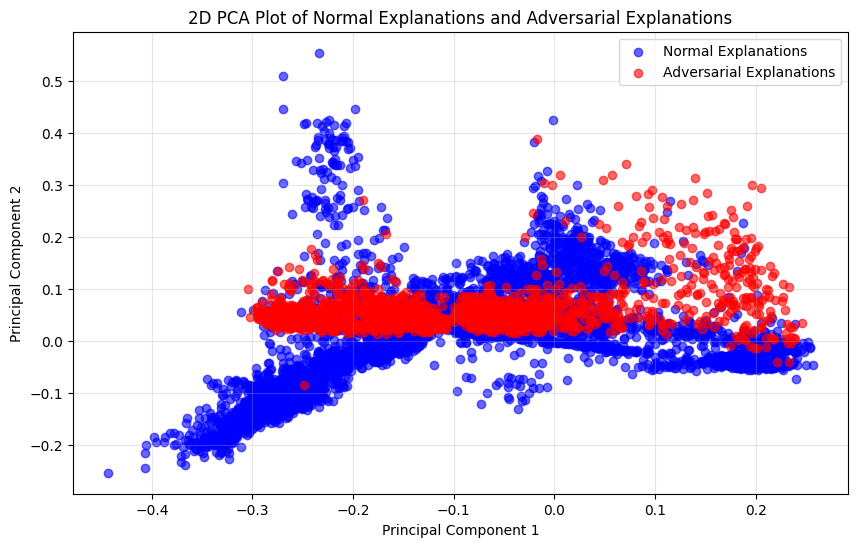

In [12]:
import functions.visualizer as visualizer
import importlib
importlib.reload(visualizer)

visualizer.visualize_data_distribution(concat_correctly_benign_classified_shaps, 'Normal Explanations', concat_misclassified_as_benign_shaps, 'Adversarial Explanations')

In [ ]:
# exp.plot_shap_summary_comparison(shap_values_df.loc[correctly_benign_classified_indices].values, X_train.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices].values, X_adv.loc[misclassified_as_benign_due_attack_indices], 6, title='Normal vs Adversarial Explanations of Benign Samples')

## Detector

In [13]:
import functions.detector as det
import importlib
importlib.reload(det)

# build detector to detect adversarial samples that misclassify attack samples as benign

# create dataframe
# TODO: build detector with normal and adversarial shap values?
# TODO: build with shap_values_adv_df to detect 'BENIGN' and 'ATTACK'
import pandas as pd

# alternative approach: detector that predicts the original label of the sample for all given adversarial attacks
# concat_correctly_benign_classified_shaps = pd.concat([shap_values_df.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[correctly_benign_classified_indices]], axis=0)
# concat_misclassified_as_benign_shaps = pd.concat([shap_values_df.loc[misclassified_as_benign_due_attack_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices]], axis=0)
X, y = det.build_train_datasets(concat_correctly_benign_classified_shaps, concat_misclassified_as_benign_shaps)

#X, y = det.build_train_datasets(shap_values_df.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices])
print(X.shape, y.shape)

# split data
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)
print(X_train_det.shape, X_test_det.shape, y_train_det.shape, y_test_det.shape)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det)

(10787, 70) (10787, 2)
(9708, 70) (1079, 70) (9708, 2) (1079, 2)
Epoch 1/10


2025-03-24 15:50:57.113988: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7232 - loss: 0.6490 - val_accuracy: 0.8265 - val_loss: 0.4234
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8642 - loss: 0.3633 - val_accuracy: 0.9382 - val_loss: 0.2087
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9294 - loss: 0.2074 - val_accuracy: 0.9547 - val_loss: 0.1447
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9430 - loss: 0.1537 - val_accuracy: 0.9573 - val_loss: 0.1204
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9511 - loss: 0.1239 - val_accuracy: 0.9624 - val_loss: 0.1065
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9535 - loss: 0.1143 - val_accuracy: 0.9640 - val_loss: 0.0975
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9653 - loss: 0.1002 - val_accuracy: 0.9660 - val_loss: 0.0916
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9659 - loss: 0.0932 - val_accuracy: 0.9665 - val_loss: 0.0871
Epo

---
## Manual Evaluation
We perform the whole two-stages approach on new unseen data and evaluate the following scores:
- Recall
- Precision
- Accuracy
- F1 Score

In [14]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

# exclude previously used samples
dataset_eval_excluded = dataset.drop(index=used_indices)

X_eval, y_eval, used_eval_indices = dp.preprocess_data(dataset_eval_excluded, encoding_type, normalizer, zero_columns, sample_size=500, random_sample_state=17)
print(f"Generate Features | Indices: {X_eval.index[:5]}... | Shape: {X_eval.shape}")
print(f"Generate Labels | Indices: {y_eval.index[:5]}... | Shape: {y_eval.shape}")
print(y_eval.value_counts())

-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (1000, 79)
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Normalizing features using MinMaxScaler ---
Generate Features | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (1000, 70)
Generate Labels | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (1000, 2)
BENIGN  ATTACK
False   True      500
True    False     500
Name: count, dtype: int64


In [15]:
importlib.reload(ag)

# X_adv_eval = ag.generate_cw_attacks_parallel(art_model, X_eval, target_label=1, num_cores=num_cores)
# print(f"Create Adversarial Attack | Indices: {X_adv_eval.index[:5]}... | Shape: {X_adv_eval.shape}")

X_adv_eval = ag.generate_fgsm_attacks(art_model, X_eval, target_label=1)
print(f"Create Adversarial Attack | Indices: {X_adv_eval.index[:5]}... | Shape: {X_adv_eval.shape}")

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_adv_eval, y_eval)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

Adversarial FGSM examples generated. Shape: (1000, 70)
Create Adversarial Attack | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (1000, 70)
Accuracy: 50.00%
              precision    recall  f1-score   support

      ATTACK       0.00      0.00      0.00       500
      BENIGN       0.50      1.00      0.67       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000

Confusion Matrix: Positive == BENIGN
TN: 0, FP: 500, FN: 0, TP: 500
Predictions on Adversarial Attacks | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (1000, 2)


In [16]:
importlib.reload(exp)
X_eval_adv_shap_values, X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_eval)

print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

PermutationExplainer explainer: 1001it [00:29, 22.45it/s]                         

Create Explanations | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (1000, 70)


In [17]:
benign_eval_idx = y_eval[y_eval['BENIGN'] == 1].index
attack_eval_idx = y_eval[y_eval['ATTACK'] == 1].index

pred_benign_idx = y_pred_adv_eval[y_pred_adv_eval['BENIGN'] == 1].index
pred_attack_idx = y_pred_adv_eval[y_pred_adv_eval['ATTACK'] == 1].index

# predict
X_eval_detector = X_eval_adv_shap_values_df.loc[pred_benign_idx]

y_pred_eval_detector = det.predict(detector, X_eval_detector, y_eval.columns)
correctly_classified_det_idx = y_pred_eval_detector[y_pred_eval_detector['BENIGN'] == 1].index
misclassified_det_idx = y_pred_eval_detector[y_pred_eval_detector['ATTACK'] == 1].index


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step


2025-03-24 15:54:18.359820: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [18]:
# After IDS Stage
TN = len(attack_eval_idx.intersection(pred_attack_idx)) # IDS classifies 'ATTACK' samples as 'ATTACK'
print(f"IDS classifies 'ATTACK' samples as 'ATTACK': {TN}")
FN = len(benign_eval_idx.intersection(pred_attack_idx)) # IDS classifies 'BENIGN' samples as 'ATTACK'
print(f"IDS mis-classifies 'BENIGN' samples as 'ATTACK': {FN}")

# After Detector Stage
TP = len(benign_eval_idx.intersection(correctly_classified_det_idx)) # Detector classifies 'BENIGN' samples as correct 'BENIGN'
print(f"Detector classifies 'BENIGN' samples as correct 'BENIGN': {TP}")
FP = len(attack_eval_idx.intersection(correctly_classified_det_idx)) # Detector classifies 'ATTACK' samples as correct 'BENIGN'
print(f"Detector mis-classifies 'ATTACK' samples as correct 'BENIGN': {FP}")

TN_2 = len(attack_eval_idx.intersection(misclassified_det_idx)) # Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'
print(f"Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK': {TN_2}")
FN_2 = len(benign_eval_idx.intersection(misclassified_det_idx)) # Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK'
print(f"Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK': {FN_2}")

# Sum up TN & FN from both stages
TN = TN + TN_2
FN = FN + FN_2

print(f"TP: {TP}")
print(f"FP: {FP}")
print(f"TN: {TN}")
print(f"FN: {FN}")
print(f"Sum: {TP + FP + TN + FN}")

IDS classifies 'ATTACK' samples as 'ATTACK': 0
IDS mis-classifies 'BENIGN' samples as 'ATTACK': 0
Detector classifies 'BENIGN' samples as correct 'BENIGN': 472
Detector mis-classifies 'ATTACK' samples as correct 'BENIGN': 12
Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK': 488
Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK': 28
TP: 472
FP: 12
TN: 488
FN: 28
Sum: 1000


In [19]:
from sklearn.metrics import classification_report

print(f"Global Accuracy: {(TP + TN) / (TP + FP + TN + FN) * 100:.2f}%")

# Construct a fake y_true and y_pred to match sklearn's classification_report format
y_true = np.array([1] * TP + [0] * TN + [1] * FN + [0] * FP)  # True labels
y_pred = np.array([1] * TP + [0] * TN + [0] * FN + [1] * FP)  # Predicted labels

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['ATTACK', 'BENIGN']) # reverse labels because classification_report assumes first label is 0
print(report)

print(f"True Negative Rate: {TN/(TN+FP)*100:.2f}%")
print(f"False Positive Rate: {FP/(TN+FP)*100:.2f}%")
print(f"True Positive Rate: {TP/(TP+FN)*100:.2f}%")
print(f"False Negative Rate: {FN/(TP+FN)*100:.2f}%")

Global Accuracy: 96.00%
              precision    recall  f1-score   support

      ATTACK       0.95      0.98      0.96       500
      BENIGN       0.98      0.94      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000

True Negative Rate: 97.60%
False Positive Rate: 2.40%
True Positive Rate: 94.40%
False Negative Rate: 5.60%
